### Биномиальный критерий для доли 

### Shaken, not stirred

Джеймс Бонд говорит, что предпочитает мартини взболтанным, но не смешанным. Проведём слепой тест (blind test): $n$ раз предложим ему пару напитков и выясним, какой из двух он предпочитает. Получаем: 
* **выборка:** бинарный вектор длины $n$, где 1 — Джеймс Бонд предпочел взболтанный напиток, 0 — смешанный;
* **гипотеза $H_0$:** Джеймс Бонд не различает 2 вида напитков и выбирает наугад;
* **статистика $T$:** количество единиц в выборке.

Альтернативная гипотеза, вообще говоря, могла бы быть разной. С одной стороны, мы могли бы рассматривать двустороннюю альтернативу — Джеймс Бонд отличает два вида напитков, и у него есть некоторые предпочтения, — или одну из односторонних — Джеймс Бонд предпочитает взболтанный мартини, так, как он утверждает, или Джеймс Бонд предпочитает смешанный.

Если нулевая гипотеза справедлива и Джеймс Бонд действительно выбирает наугад, то мы можем с одинаковой вероятностью получить любой из $2^n$ бинарных векторов длины $n$. 

Мы могли бы перебрать все такие векторы, посчитать на каждом значение статистики $T$ и получить таким образом её нулевое распределение. Но в данном случае этот этап можно пропустить: мы имеем дело с выборкой, состоящей из 0 и 1, то есть, из распределения Бернулли $Ber(p)$. Нулевая гипотеза выбора наугад соответствует значению $p=\frac1{2}$, то есть, в каждом эксперименте вероятность выбора взболтанного мартини равна $\frac1{2}$. 

**Сумма $n$ одинаково распределённых бернуллиевских случайных величин с параметром $p$ имеет биномиальное распределение $Bin(n, p)$.** Следовательно, нулевое распределение статистики $T$ — $Bin\left(n, \frac1{2}\right)$.

Пусть $n=16.$

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

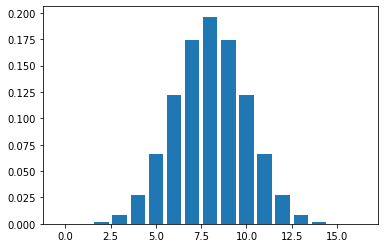

In [10]:
n = 16
F_H0 = stats.binom(n, 0.5)

x = np.linspace(0, 16, 17)
plt.bar(x, F_H0.pmf(x), align = 'center')
plt.show()

### Односторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает взболтанный мартини.

При такой альтернативе более вероятны большие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом хвосте распределения.

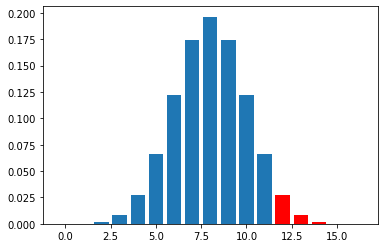

In [11]:
plt.bar(x, F_H0.pmf(x), align = 'center')
plt.bar(np.linspace(12,16,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
plt.show()

In [13]:
# Передаем параметры распределения (число успехов 12, общее число испытаний 16, параметр p и односторонняя альтернатива greater)
p_value = stats.binom_test(12, 16, 0.5, alternative = 'greater')
print('p_value: ', p_value)

p_value:  0.0384063720703125


При уровне значимсоти 0.05 мы можем отвергнуть нулевую гипотезу. 

Теперь допустим что число успехов 11

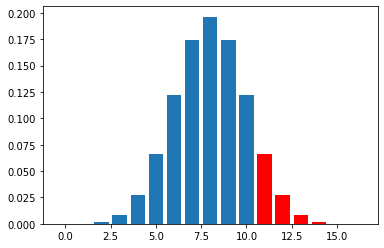

In [15]:
plt.bar(x, F_H0.pmf(x), align = 'center')
plt.bar(np.linspace(11, 16, 6), F_H0.pmf(np.linspace(11, 16, 6)), align = 'center', color='red')
plt.show()

In [17]:
p_value = stats.binom_test(11, 16, 0.5, alternative = 'greater')
print('p_value: ', p_value)

p_value:  0.10505676269531246


Уже не можем отвернуть нулевую гипотезу

### Двусторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает какой-то определённый вид мартини (какой именно мы не знаем)

При такой альтернативе более вероятны очень большие и очень маленькие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом и левом хвостах распределения.

Допустим, число успехов 12

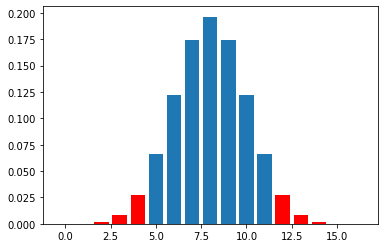

In [18]:
plt.bar(x, F_H0.pmf(x), align = 'center')
plt.bar(np.linspace(12, 16, 5), F_H0.pmf(np.linspace(12, 16, 5)), align = 'center', color='red')
plt.bar(np.linspace(0, 4, 5), F_H0.pmf(np.linspace(0, 4, 5)), align = 'center', color='red')
plt.show()

In [19]:
p_value = stats.binom_test(12, 16, 0.5, alternative = 'two-sided')
print('p_value: ', p_value)

p_value:  0.076812744140625


При двусторроней альтернативе уже недостаточно 12 успехов, не можем отвергнуть нулевую гипотезу. Допустим, произошло 13 успехов

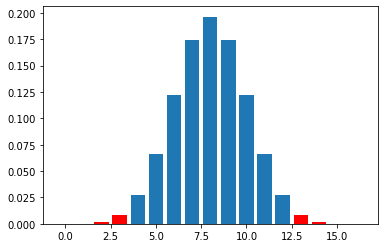

In [24]:
plt.bar(x, F_H0.pmf(x), align = 'center')
plt.bar(np.linspace(13, 16, 4), F_H0.pmf(np.linspace(13, 16, 4)), align = 'center', color='red')
plt.bar(np.linspace(0, 3, 4), F_H0.pmf(np.linspace(0 ,3, 4)), align = 'center', color='red')
plt.show()

In [25]:
p_value = stats.binom_test(13, 16, 0.5, alternative = 'two-sided')
print('p_value: ', p_value)

p_value:  0.021270751953125
